In [1]:
#importing needed libraries 
import pandas as pd
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import plotly.offline as py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [2]:
# uploading data
data = pd.read_csv("Downloads/7282_1.csv")

In [3]:
# Cheching shape of data
data.shape

(35912, 19)

In [4]:
# printing the head of data
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [5]:
# checking for null values
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               22
reviews.title            1622
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64

In [6]:
# getting stats summary for cloumn ('reviews.rating')
data['reviews.rating'].describe()

count    35050.000000
mean         3.776431
std          1.416195
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: reviews.rating, dtype: float64

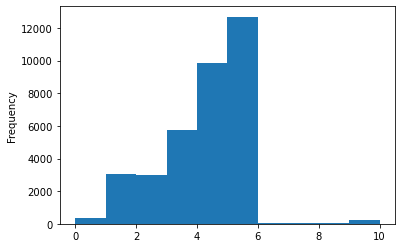

In [7]:
# lpoting the frequency distribution for cloumn ('reviews.rating')
data['reviews.rating'].plot(kind='hist', bins=10);

In [10]:
# ploting the top 10 hotels with highiest avarage ratings
q2 = data.groupby('name')['reviews.rating'].mean().reset_index().sort_values(by='reviews.rating', ascending=False)[:10]
trace = go.Bar(
    x=q2['name'],
    y=q2['reviews.rating'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),    
    opacity=0.6
)

data1 = [trace]

layout = go.Layout(
    title='Bar Chat Showing Top 10 Hotels With Highest Average Ratings.',
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='hotel-reviews-highest-rating')

In [11]:
#ploting the top 20 cities with highest reviews
q3 = data['city'].value_counts()[:20]
trace = go.Bar(
    x=q3.index,
    y=q3.values,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),    
    opacity=0.6
)

data1 = [trace]

layout = go.Layout(
    title='Bar Chart Showing Top 20 Cities With Highest Reviews.',
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='hotel-reviews-highest-cities')

In [12]:
# Derive binary classification target:
# We define a 'Best' hotels
# overall rating of 5 or higher, on a 10 point scale.
# Drop unrated hotels.

data = data.dropna(subset=['reviews.rating'])
data['Best'] = data['reviews.rating'] >= 5

In [13]:
# choose a target
y = data['Best']

In [14]:
# There are 2 classes
# this is a binary classification problem.

y.nunique()

2

In [15]:
# The majority class occurs with 62% frequency, 
# so this is not too imbalanced.

y.value_counts(normalize=True)

False    0.628302
True     0.371698
Name: Best, dtype: float64

In [16]:
data.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
Best                       bool
dtype: object

In [17]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   76
longitude                  76
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35050
reviews.id              35050
reviews.rating              0
reviews.text               22
reviews.title             892
reviews.userCity        18915
reviews.username           43
reviews.userProvince    17644
Best                        0
dtype: int64

In [18]:
data.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,34974.000000,34974.000000,0.0,0.0,35050.000000
mean,37.294687,-85.774960,NaN,NaN,3.776431
std,7.004933,33.322345,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.802822,-104.983568,NaN,NaN,3.000000
50%,37.933273,-86.868140,NaN,NaN,4.000000
75%,41.700640,-77.072470,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [19]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   76
longitude                  76
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35050
reviews.id              35050
reviews.rating              0
reviews.text               22
reviews.title             892
reviews.userCity        18915
reviews.username           43
reviews.userProvince    17644
Best                        0
dtype: int64

In [20]:
# Drop some high cardinality categoricals


data = data.drop(columns=['address', 'latitude', 'longitude', 'reviews.dateAdded', 'reviews.doRecommend', 'reviews.title', 'reviews.id'])

In [21]:
data['reviews.text'] = data['reviews.text'].fillna('')

In [22]:
data.isnull().sum()

categories                  0
city                        0
country                     0
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.rating              0
reviews.text                0
reviews.userCity        18915
reviews.username           43
reviews.userProvince    17644
Best                        0
dtype: int64

In [23]:
data.shape

(35050, 13)

In [24]:
# Convert date_recorded to datetime
 
data['reviews.date'] = pd.to_datetime(data['reviews.date'], infer_datetime_format=True)

In [25]:
data['reviews.text'] = data['reviews.text'].apply(str.lower)

In [26]:
# sentiment analysis

positive_words = ['great', 'good', 'pleasant', 'Only' , 'park','No', 'real', 'complaints', 'hotel', 'great',  'location', 'surroundings', 'amenities', 'service','recommendations', 'however', 'firstly','staff', 'upon', 'check', 'very', 'confusing', 'regarding', 'deposit', 'payments',  'staff', 'offer', 'upon', 'checkout',  'refund','original', 'payment','confusing', 'Secondly', 'restaurant',  'lacking', 'very', 'well', 'thought', 'excellent', 'quality', 'food',  'vegetarian', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'Location', 'was', 'good','Amazing', 'location', 'and', 'building', 'Romantic', 'setting', 'and', 'staff', 'were', 'ok', 'It', 'is', 'cute', 'hotel', 'the', 'breakfast', 'range', 'is', 'nice', 'Will', 'go', 'back','from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'Amsterdam', 'outside', 'beautiful','smile','give', 'peace', 'lovable', 'best behaviour', 'minimum walk','lovely', 'clean', 'good location','loving', 'wonderful','special','be kind,' 'like','nice', 'sweat', 'greatful', 'enjoy','kindness','plentiful','dream','giving','amazing','durable','happening','ideal']

negative_words = ['bad', 'horrible', 'bad location', 'not clean', 'no','staff', 'bad behaviour','awful', 'sad','lost','failure','helpless','rejected','unhappy','confused','scared','panic','frustrated','troubled','lonely','feeble','panic','embarrassed', 'dirty','']




def count_positives(review):
    positive_count = 0
    for word in review.split(' '):
        if word in positive_words:
            positive_count += 1
    return positive_count

def count_negatives(review):
    negative_count = 0
    for word in review.split(' '):
        if word in negative_words:
            negative_count += 1
    return negative_count    

In [27]:
#positive and negative word counts from the review
data['positive_word_count'] = data['reviews.text'].apply(count_positives)
data['negative_word_count'] = data['reviews.text'].apply(count_negatives)    

#sentiment score (number of positives words minus the number of negative words)
data['sentiment_score'] = data['positive_word_count'] - data['negative_word_count']

#feature that counts the length of the review- maybe there is a relationship 
#between the length of a review and whether or not its a high rating
data['review_length'] = data['reviews.text'].apply(len)


In [28]:
data.head()

,categories,city,country,name,postalCode,province,reviews.date,reviews.rating,reviews.text,reviews.userCity,reviews.username,reviews.userProvince,Best,positive_word_count,negative_word_count,sentiment_score,review_length
0,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,2013-09-22,4.0,pleasant 10 min walk along the sea front to th...,NaN,Russ (kent),NaN,False,10,0,10,194
1,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,2015-04-03,5.0,really lovely hotel. stayed on the very top fl...,NaN,A Traveler,NaN,True,18,1,17,252
2,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,2014-05-13,5.0,ett mycket bra hotell. det som drog ner betyge...,NaN,Maud,NaN,True,1,0,1,136
3,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,2013-10-27,5.0,we stayed here for four nights in october. the...,NaN,Julie,NaN,True,15,1,14,354
4,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,2015-03-05,5.0,we stayed here for four nights in october. the...,NaN,sungchul,NaN,True,15,1,14,354


Text(0.5, 1.0, 'Correlation between different fearures')

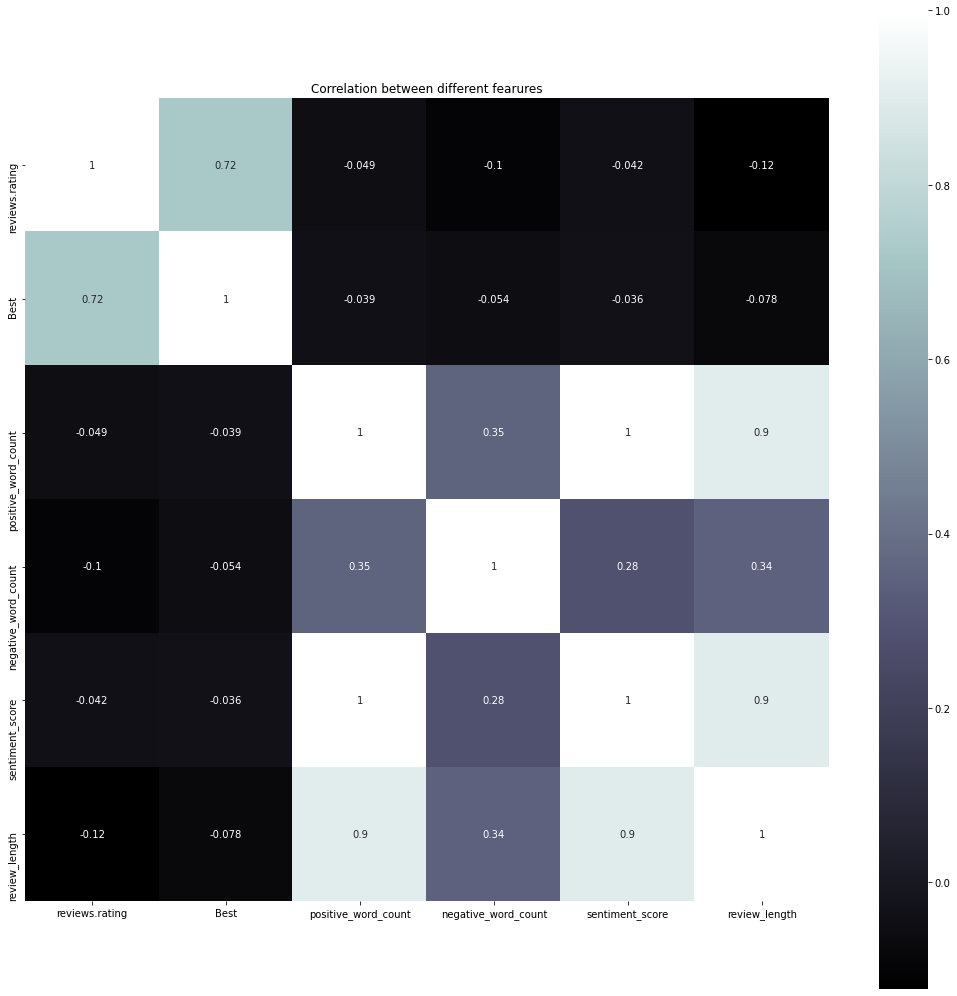

In [29]:
correlation = data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='bone')

plt.title('Correlation between different fearures')

In [30]:
# split train , test , val
train = data[data['reviews.date'].dt.year <= 2013]
val = data[data['reviews.date'].dt.year == 2014]
test = data[data['reviews.date'].dt.year >= 2015]

In [31]:
train.shape, val.shape , test.shape

((4158, 17), (3342, 17), (27291, 17))

In [32]:
# set up the features

target = 'Best'

features = data.columns.drop([target, 'reviews.date','reviews.text','reviews.rating'])



# Arrange data into X features matrix and y target vector 

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [33]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

print('Train Accuracy', pipeline.score(X_train, y_train))

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.976911976911977
Validation Accuracy 0.6867145421903053


In [34]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(n_estimators = 100, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

print('Train Accuracy', pipeline.score(X_train, y_train))

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.976911976911977
Validation Accuracy 0.6642728904847397


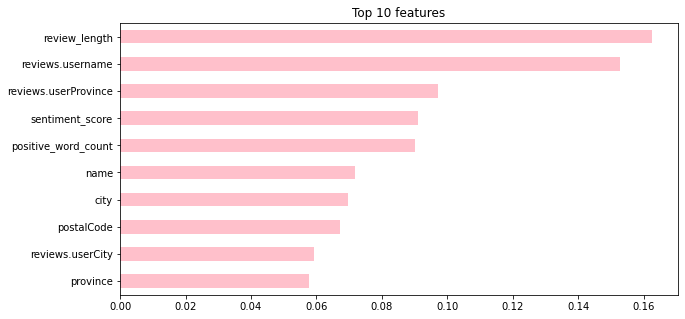

In [35]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='pink');

In [36]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

print('Train Accuracy', pipeline.score(X_train, y_train))

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.976911976911977
Validation Accuracy 0.5864751645721125


In [37]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    LinearRegression()
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

print('Train Accuracy', pipeline.score(X_train, y_train))

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.03645228588383287
Validation Accuracy 0.0017811921616731619
